In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',header=None,delimiter=r'\s+',names=col)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X=data.iloc[:,:-1]
y=data['MEDV']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)


In [6]:
model = DecisionTreeRegressor(random_state=3,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [7]:
ypred = model.predict(x_test)

In [8]:
pd.DataFrame({'Actual':y_test,'Pridicted':ypred}).sample(10)

,Actual,Pridicted
114,18.5,20.919672
333,22.2,24.109615
359,22.6,20.919672
396,12.5,14.870833
60,18.7,20.919672
296,27.1,24.109615
349,26.6,31.851111
301,22.0,20.919672
190,37.0,31.851111
111,22.8,20.919672


(127, 13) (127,)


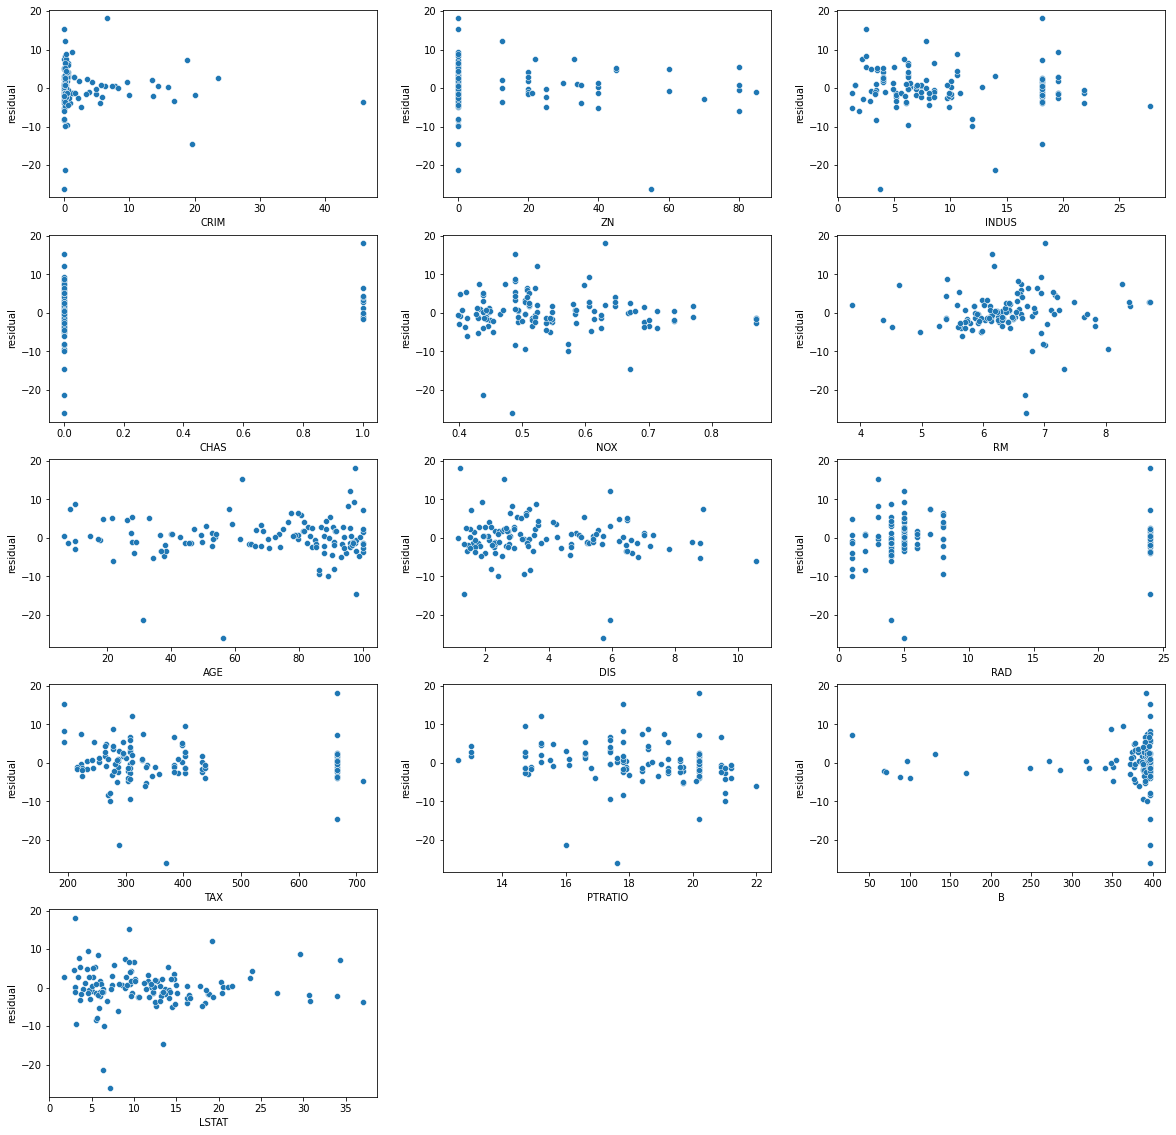

In [9]:
print(x_test.shape,ypred.shape)
# print(x_test.iloc[:,1])
plt.figure(figsize=(20,20))

for i in range(x_test.shape[1]):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x_test.iloc[:,i],(y_test-ypred))
    plt.ylabel('residual')



In [10]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.8803818479195854, 0.7133356617456756)

In [11]:
model.get_n_leaves()

15